### Original

Tải bộ dữ liệu WELFake

In [1]:
!gdown 1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3

Downloading...
From (original): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3
From (redirected): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3&confirm=t&uuid=c79f9aa8-ed28-4062-8f98-37b33a45c1ea
To: /content/WELFake_Dataset.csv
100% 245M/245M [00:04<00:00, 56.2MB/s]


In [2]:
import pandas as pd

df = pd.read_csv("/content/WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


Xóa các kí tự null và nối cột title vào cột test

In [3]:
df.dropna(subset = ['text', 'title'], inplace = True)
df['text'] = df['title'] + ' ' + df['text']
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...","Bobby Jindal, raised Hindu, uses story of Chri...",0
4,4,SATAN 2: Russia unvelis an image of its terrif...,SATAN 2: Russia unvelis an image of its terrif...,1
5,5,About Time! Christian Group Sues Amazon and SP...,About Time! Christian Group Sues Amazon and SP...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,Russians steal research on Trump in hack of U....,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,Trump tussle gives unpopular Mexican leader mu...,0


In [5]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(14308,)

Xây dựng mô hình 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,695,169 (10.28 MB)

 Trainable params: 2,693,633 (10.28 MB)

 Non-trainable params: 1,536 (6.00 KB)

Huấn luyện mô hình

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_data=(X_test_tfidf, y_test),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8879 - loss: 1.0799 - val_accuracy: 0.9460 - val_loss: 0.4564 - learning_rate: 0.0010
Epoch 2/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9379 - loss: 0.4535 - val_accuracy: 0.9472 - val_loss: 0.3868 - learning_rate: 0.0010
Epoch 3/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9393 - loss: 0.4055 - val_accuracy: 0.9454 - val_loss: 0.3709 - learning_rate: 0.0010
Epoch 4/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9423 - loss: 0.3826 - val_accuracy: 0.9514 - val_loss: 0.3400 - learning_rate: 0.0010
Epoch 5/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9458 - loss: 0.3441 - val_accuracy: 0.9495 - val_loss: 0.3251 - learning_rate: 0.0010
Epoch 6/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9461 - loss: 0.3304 - val_accuracy: 0.9530 - val_loss: 0.3033 - learning_rate: 0.0010
Epoch 7/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9469

Vẽ đồ thị học accuracy và loss

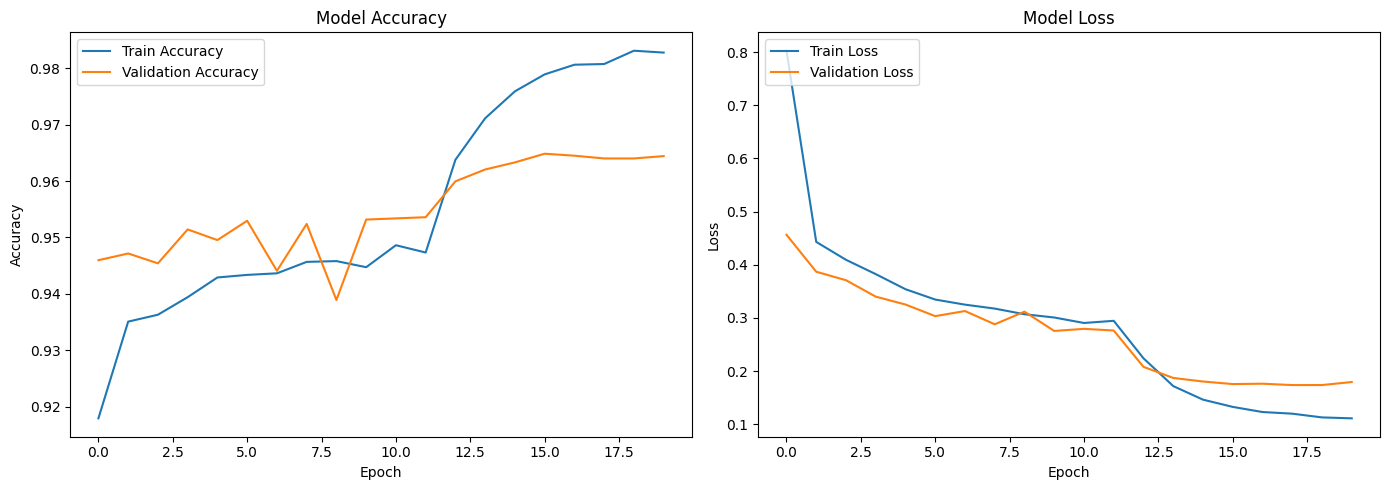

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Đánh giá mô hình 

In [10]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.9640061504053676
Precision: 0.9592227695675971
Recall: 0.9699737096997371
F1-score: 0.9645682834537324
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7081
           1       0.96      0.97      0.96      7227

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



Vẽ ma trận nhầm lẫn 

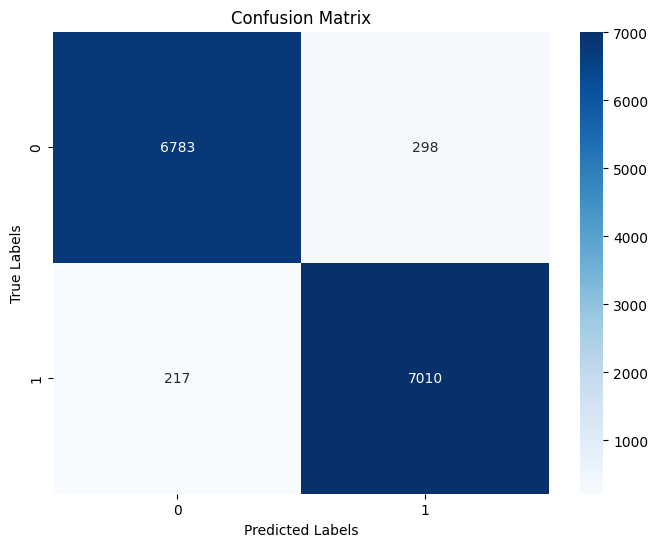

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### SR

Thực hiện tăng cường dữ liệu bằng cách thay thế từ đồng nghĩa (SR)

In [12]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def replace_synonyms(text):
    words = word_tokenize(text)
    replaced_text = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            replaced_text.append(synonym.replace('_', ' '))
        else:
            replaced_text.append(word)
    return ' '.join(replaced_text)

def remove_function_words(text):
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def preprocess_txt(text, use_synonyms=False, use_fwd=False):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    if use_synonyms:
        text = replace_synonyms(text)

    if use_fwd:
        text = remove_function_words(text)

    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens]

    unique_tokens = []
    for token in tokens:
        if token not in unique_tokens:
            unique_tokens.append(token)

    preprocessed_text = ' '.join(unique_tokens)
    return preprocessed_text

df['preprocessed_text'] = df['text'].apply(lambda x: preprocess_txt(x, use_synonyms=True, use_fwd=False) if isinstance(x, str) else "")

X = df['preprocessed_text']
y = df['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(14308,)

Xây dụng mô hình

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,695,169 (10.28 MB)

 Trainable params: 2,693,633 (10.28 MB)

 Non-trainable params: 1,536 (6.00 KB)

Huấn luyện mô hình 

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_data=(X_test_tfidf, y_test),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9022 - loss: 1.0892 - val_accuracy: 0.9539 - val_loss: 0.4833 - learning_rate: 0.0010
Epoch 2/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9510 - loss: 0.4727 - val_accuracy: 0.9593 - val_loss: 0.4124 - learning_rate: 0.0010
Epoch 3/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9538 - loss: 0.4251 - val_accuracy: 0.9585 - val_loss: 0.4034 - learning_rate: 0.0010
Epoch 4/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9555 - loss: 0.4011 - val_accuracy: 0.9604 - val_loss: 0.3522 - learning_rate: 0.0010
Epoch 5/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9574 - loss: 0.3630 - val_accuracy: 0.9643 - val_loss: 0.3302 - learning_rate: 0.0010
Epoch 6/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9581 - loss: 0.3447 - val_accuracy: 0.9549 - val_loss: 0.3422 - learning_rate: 0.0010
Epoch 7/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9612 -

Vẽ đồ thị học accuracy và loss

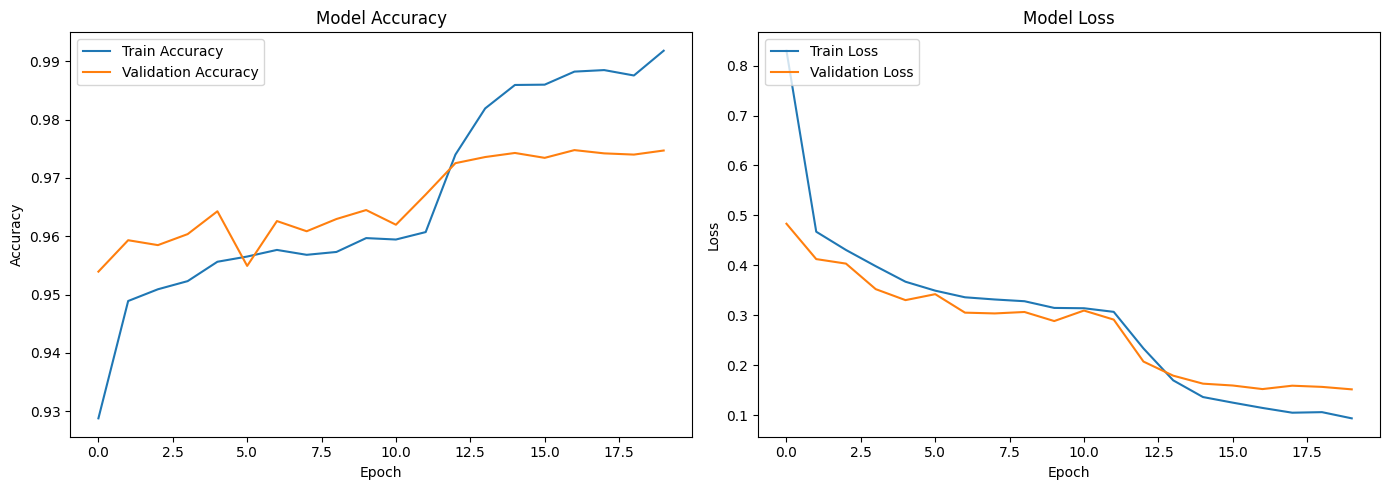

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Đánh giá mô hình

In [17]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9746994688286273
Precision: 0.9733829816577024
Recall: 0.9766154697661547
F1-score: 0.974996546484321
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      7081
           1       0.97      0.98      0.97      7227

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308



Vẽ ma trận nhầm lẫn 

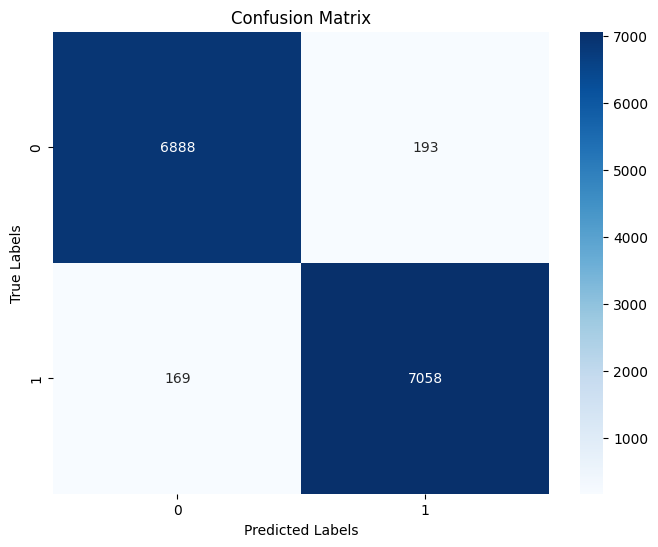

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### FWD

Thực hiện tăng cường dữ liệu xóa các từ không cần thiết (FWD)

In [19]:
df['preprocessed_text'] = df['text'].apply(lambda x: preprocess_txt(x, use_synonyms=True, use_fwd=False) if isinstance(x, str) else "")

X = df['preprocessed_text']
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(14308,)

Xây dựng mô hình 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,695,169 (10.28 MB)

 Trainable params: 2,693,633 (10.28 MB)

 Non-trainable params: 1,536 (6.00 KB)

Huấn luyện mô hình 

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_data=(X_test_tfidf, y_test),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8961 - loss: 1.0933 - val_accuracy: 0.9507 - val_loss: 0.4832 - learning_rate: 0.0010
Epoch 2/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9487 - loss: 0.4705 - val_accuracy: 0.9579 - val_loss: 0.4076 - learning_rate: 0.0010
Epoch 3/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9515 - loss: 0.4191 - val_accuracy: 0.9589 - val_loss: 0.3716 - learning_rate: 0.0010
Epoch 4/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9553 - loss: 0.3836 - val_accuracy: 0.9572 - val_loss: 0.3569 - learning_rate: 0.0010
Epoch 5/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9572 - loss: 0.3590 - val_accuracy: 0.9658 - val_loss: 0.3166 - learning_rate: 0.0010
Epoch 6/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9594 - loss: 0.3392 - val_accuracy: 0.9604 - val_loss: 0.3253 - learning_rate: 0.0010
Epoch 7/20
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9614 

Vẽ đồ thị học accuracy và loss 

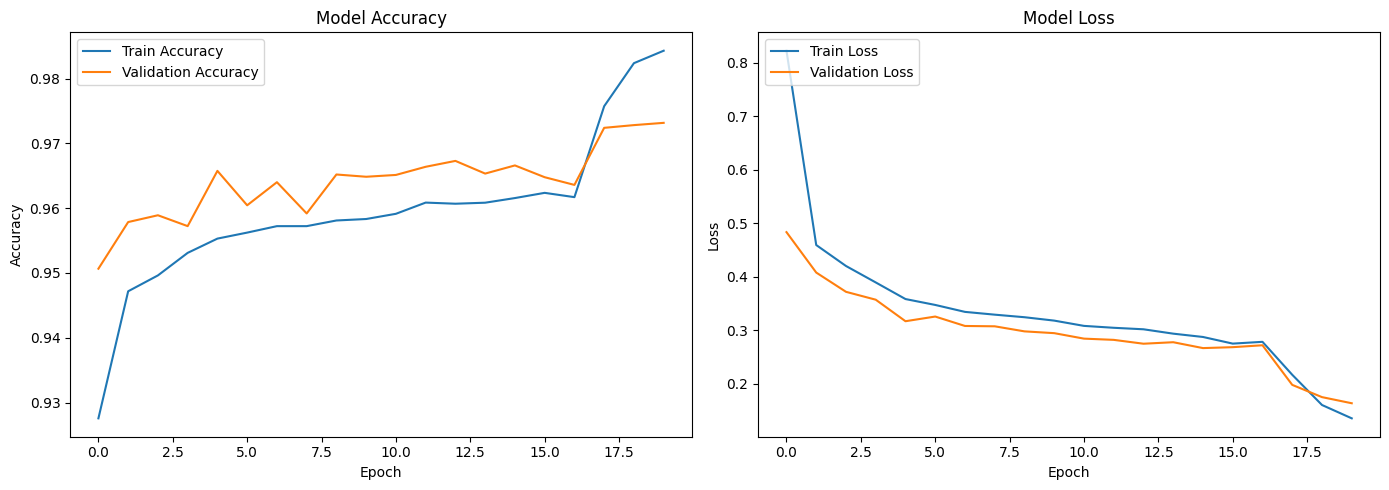

In [23]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Đánh giá mô hình 

In [24]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9731618674867207
Precision: 0.9792688051547835
Recall: 0.9673446796734468
F1-score: 0.9732702213559794
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      7081
           1       0.98      0.97      0.97      7227

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308



Vẽ ma trận nhầm lẫn 

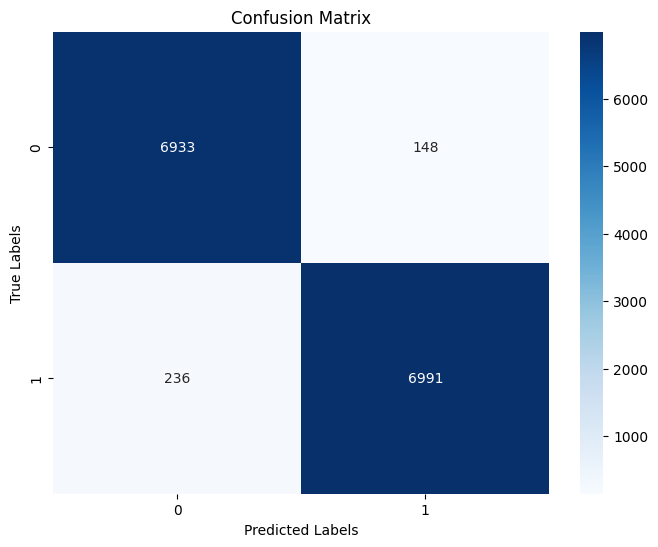

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()